### Oakland Crime Statistics 2011 to 2016

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from math import ceil
import numpy as np
%matplotlib inline

data1 = pd.read_csv("records-for-2011.csv",encoding="utf-8")
data2 = pd.read_csv("records-for-2012.csv",encoding="utf-8")
data3 = pd.read_csv("records-for-2013.csv",encoding="utf-8")
data4 = pd.read_csv("records-for-2014.csv",encoding="utf-8")
data5 = pd.read_csv("records-for-2015.csv",encoding="utf-8")
data6 = pd.read_csv("records-for-2016.csv",encoding="utf-8")
data_all_crime = [data1, data2, data3, data4, data5, data6]

data1.head(5)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


**观察数据集可以发现，该犯罪统计的数据集内没有严格意义上的数值属性，所以对于非数值属性的五数概括以及数据直方图、盒图等可视化没有意义**

**下面进行标称属性频数计算**

In [10]:
data2.head(5)

,Agency,Create Time,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes
0,OP,2012-01-01T00:00:25.000,2.0,32Y,2.0,415GS,415 GUNSHOTS,LOP120101000004,2012-01-01T00:40:27.000,"{'human_address': '{""address"": ""OLIVE ST"", ""ci...",NaN
1,OP,2012-01-01T00:00:27.000,2.0,30Y,2.0,415GS,415 GUNSHOTS,LOP120101000003,2012-01-01T01:34:31.000,"{'human_address': '{""address"": ""AV&MACARTHUR B...",NaN
2,OP,2012-01-01T00:00:48.000,1.0,06X,2.0,949,SUSPICIOUS VEHICLE,LOP120101000005,2012-01-01T01:18:38.000,"{'human_address': '{""address"": ""SYCAMORE ST"", ...",NaN
3,OP,2012-01-01T00:00:58.000,2.0,35X,2.0,415GS,415 GUNSHOTS,LOP120101000008,2012-01-01T02:37:00.000,"{'human_address': '{""address"": ""AV&MACARTHUR B...",NaN
4,OP,2012-01-01T00:01:14.000,1.0,02Y,2.0,415GS,415 GUNSHOTS,LOP120101000007,2012-01-01T02:12:39.000,"{'human_address': '{""address"": ""ST&WOOD ST"", ""...",NaN


In [11]:
data3.head(5)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2013-01-01T00:00:00.000,D ST,2.0,33X,1.0,415GS,415 GUNSHOTS,LOP130101000002,2013-01-01T00:47:51.000
1,OP,2013-01-01T00:00:05.000,ARTHUR ST,2.0,30X,2.0,415GS,415 GUNSHOTS,LOP130101000004,2013-01-01T01:30:58.000
2,OP,2013-01-01T00:00:50.000,BRIDGE AV,2.0,23X,1.0,243E,BATTERY ON CO-HABITA,LOP130101000003,2013-01-01T05:05:50.000
3,OP,2013-01-01T00:02:16.000,AV&BROOKDALE AV,2.0,29X,2.0,415GS,415 GUNSHOTS,LOP130101000005,2013-01-01T01:37:27.000
4,OP,2013-01-01T00:02:47.000,AV&SAN LEANDRO ST,2.0,26Y,2.0,415GS,415 GUNSHOTS,LOP130101000006,2013-01-01T01:33:11.000


In [12]:
data4.head(5)

,Agency,Create Time,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes
0,OP,2014-01-01T00:00:00.000,1.0,02X,2,415GS,415 GUNSHOTS,LOP140101000001,2014-01-01T03:22:08.000,"{'human_address': '{""address"": ""LINDEN ST"", ""c...",NaN
1,OP,2014-01-01T00:00:00.000,2.0,26Y,2,415GS,415 GUNSHOTS,LOP140101000002,2014-01-01T02:56:31.000,"{'human_address': '{""address"": ""AV&INTERNATION...",NaN
2,OP,2014-01-01T00:00:00.000,2.0,30Y,2,415GS,415 GUNSHOTS,LOP140101000004,2014-01-01T00:49:53.000,"{'human_address': '{""address"": ""AV&MACARTHUR B...",NaN
3,OP,2014-01-01T00:00:00.000,2.0,30Y,2,415GS,415 GUNSHOTS,LOP140101000005,2014-01-01T02:51:11.000,"{'human_address': '{""address"": ""MACARTHUR BLVD...",NaN
4,OP,2014-01-01T00:01:04.000,2.0,35X,2,CODE7,SUBJECT ARMED WITH W,LOP140101000010,2014-01-01T05:33:22.000,"{'human_address': '{""address"": ""AV&DOWLING ST""...",NaN


In [13]:
data5.head(5)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2015-01-01T00:01:59.000,S ELMHURST AV,P3,31Y,2,415,DISTURBING THE PEACE,LOP150101000003,2015-01-01T06:23:08.000
1,OP,2015-01-01T00:02:02.000,AV&D ST,P3,32X,2,415GS,415 GUNSHOTS,LOP150101000007,2015-01-01T01:44:40.000
2,OP,2015-01-01T00:02:06.000,BANCROFT AV,P3,30Y,2,933R,ALARM-RINGER,LOP150101000004,2015-01-01T02:12:39.000
3,OP,2015-01-01T00:03:16.000,MACARTHUR BLVD,P3,30Y,2,415GS,415 GUNSHOTS,LOP150101000005,2015-01-01T01:53:08.000
4,OP,2015-01-01T00:03:45.000,ST&ADELINE ST,P1,02X,2,415GS,415 GUNSHOTS,LOP150101000009,2015-01-01T00:37:09.000


In [14]:
data6.head(5)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000



records-for-2011.csv的频数聚合分析:


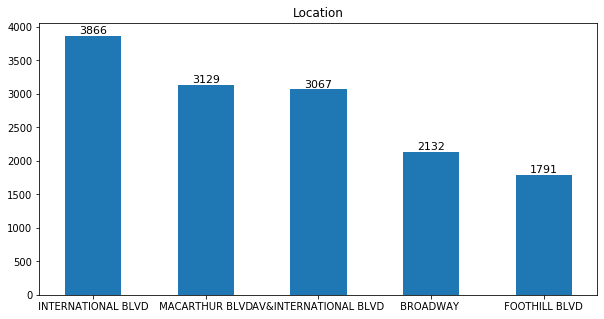

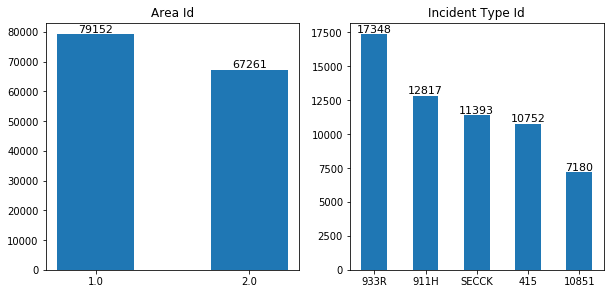

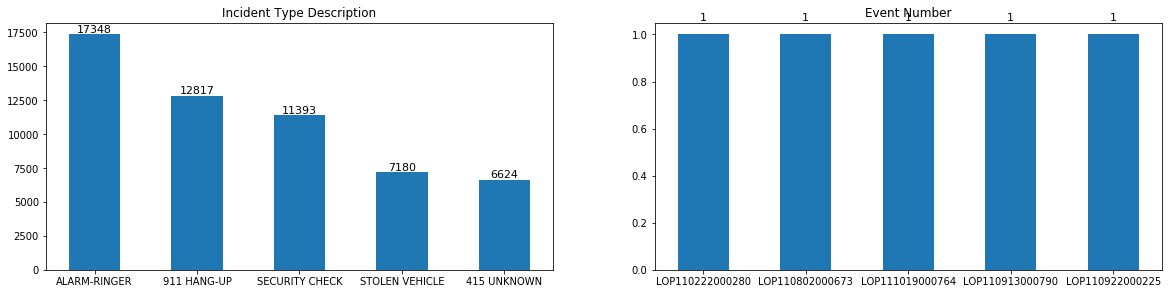

In [17]:
#2011年犯罪数据频数计算
year=2011
data1_number=data1
data1_number=data1_number.dropna(axis=0,how='all')

print("\nrecords-for-" + str(year)+".csv的频数聚合分析:")
data1_location_g=[]

data1_location=data1_number["Location"].value_counts(sort=True)
data1_location=data1_location.head(5)
data1_location_name=data1_location.index.tolist()
data1_location_num=data1_location.values
        
data1_area=data1_number["Area Id"].value_counts(sort=True)
data1_area=data1_area.head(2)
data1_area_name=data1_area.index.tolist()
data1_area_num=data1_area.values

data1_id=data1_number["Incident Type Id"].value_counts(sort=True)
data1_id=data1_id.head(5)
data1_id_name=data1_id.index.tolist()
data1_id_num=data1_id.values
    
data1_Description=data1_number["Incident Type Description"].value_counts(sort=True)
data1_Description=data1_Description.head(5)
data1_Description_name=data1_Description.index.tolist()
data1_Description_num=data1_Description.values

data1_Event=data1_number["Event Number"].value_counts(sort=True)
data1_Event=data1_Event.head(5)
data1_Event_name=data1_Event.index.tolist()
data1_Event_num=data1_Event.values
    
index=np.arange(5)
index_id=np.arange(2) 
plt.figure(figsize=(10, 5))
plt.bar(index,data1_location_num, 0.5, label="num")
plt.xticks(index,data1_location_name)
for a,b in zip(index,data1_location_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Location")

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)

plt.sca(ax1)
plt.bar(index_id,data1_area_num, 0.5, label="num")
plt.xticks(index_id,data1_area_name)
for a,b in zip(index_id,data1_area_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Area Id")

plt.sca(ax2)
plt.bar(index,data1_id_num, 0.5, label="num")
plt.xticks(index,data1_id_name)
for a,b in zip(index,data1_id_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Id")
    
plt.figure(figsize=(20,10))
ax3 = plt.subplot(2,2,1)
ax4 = plt.subplot(2,2,2)
plt.sca(ax3)
plt.bar(index,data1_Description_num, 0.5, label="num")
plt.xticks(index,data1_Description_name)
for a,b in zip(index,data1_Description_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Description")
    
plt.sca(ax4)
plt.bar(index,data1_Event_num, 0.5, label="num")
plt.xticks(index,data1_Event_name)
for a,b in zip(index,data1_Event_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Event Number")
    
plt.show()


records-for-2012.csv的频数聚合分析:


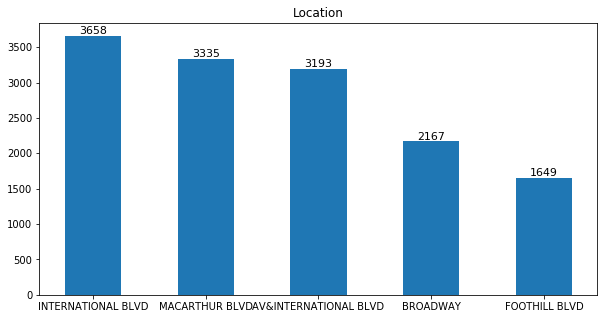

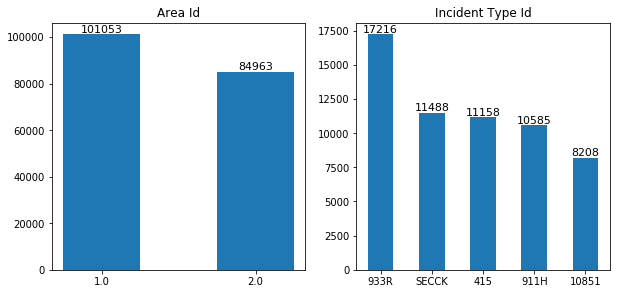

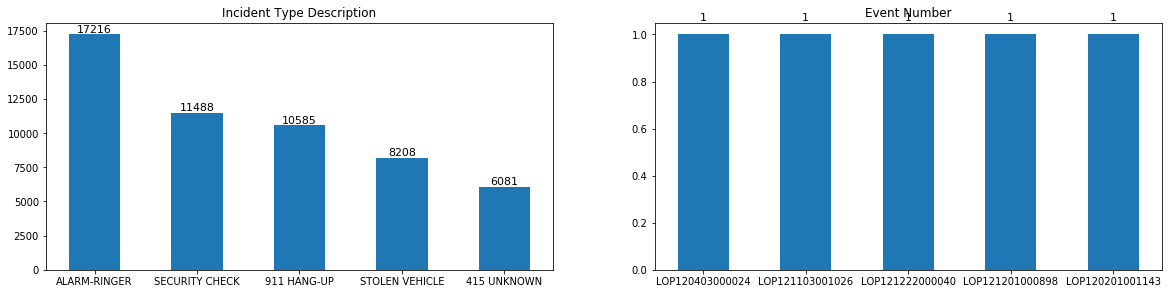

In [18]:
#2012年犯罪数据频数计算
year=2012
data1_number=data2
data1_number=data1_number.dropna(axis=0,how='all')

print("\nrecords-for-" + str(year)+".csv的频数聚合分析:")
data1_location_g=[]

data1_location=data1_number["Location 1"].value_counts(sort=True)
data1_location=data1_location.head(5)
data1_location_name=data1_location.index.tolist()
data1_location_num=data1_location.values
for data_g in data1_location_name:
    data1_location_g.append(data_g.split('"')[3])
data1_location_name=data1_location_g
        
data1_area=data1_number["Area Id"].value_counts(sort=True)
data1_area=data1_area.head(2)
data1_area_name=data1_area.index.tolist()
data1_area_num=data1_area.values

data1_id=data1_number["Incident Type Id"].value_counts(sort=True)
data1_id=data1_id.head(5)
data1_id_name=data1_id.index.tolist()
data1_id_num=data1_id.values
    
data1_Description=data1_number["Incident Type Description"].value_counts(sort=True)
data1_Description=data1_Description.head(5)
data1_Description_name=data1_Description.index.tolist()
data1_Description_num=data1_Description.values

data1_Event=data1_number["Event Number"].value_counts(sort=True)
data1_Event=data1_Event.head(5)
data1_Event_name=data1_Event.index.tolist()
data1_Event_num=data1_Event.values
    
index=np.arange(5)
index_id=np.arange(2) 
plt.figure(figsize=(10, 5))
plt.bar(index,data1_location_num, 0.5, label="num")
plt.xticks(index,data1_location_name)
for a,b in zip(index,data1_location_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Location")

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)

plt.sca(ax1)
plt.bar(index_id,data1_area_num, 0.5, label="num")
plt.xticks(index_id,data1_area_name)
for a,b in zip(index_id,data1_area_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Area Id")

plt.sca(ax2)
plt.bar(index,data1_id_num, 0.5, label="num")
plt.xticks(index,data1_id_name)
for a,b in zip(index,data1_id_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Id")
    
plt.figure(figsize=(20,10))
ax3 = plt.subplot(2,2,1)
ax4 = plt.subplot(2,2,2)
plt.sca(ax3)
plt.bar(index,data1_Description_num, 0.5, label="num")
plt.xticks(index,data1_Description_name)
for a,b in zip(index,data1_Description_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Description")
    
plt.sca(ax4)
plt.bar(index,data1_Event_num, 0.5, label="num")
plt.xticks(index,data1_Event_name)
for a,b in zip(index,data1_Event_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Event Number")
    
plt.show()


records-for-2013.csv的频数聚合分析:


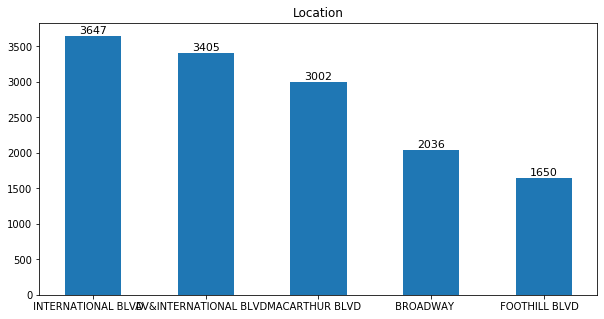

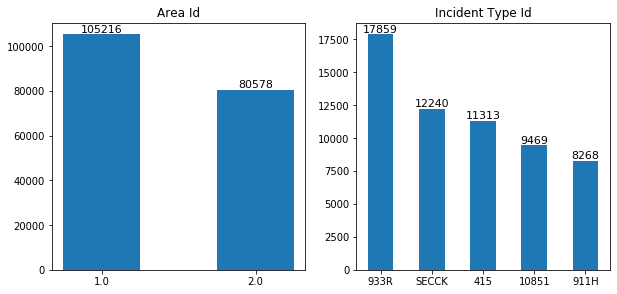

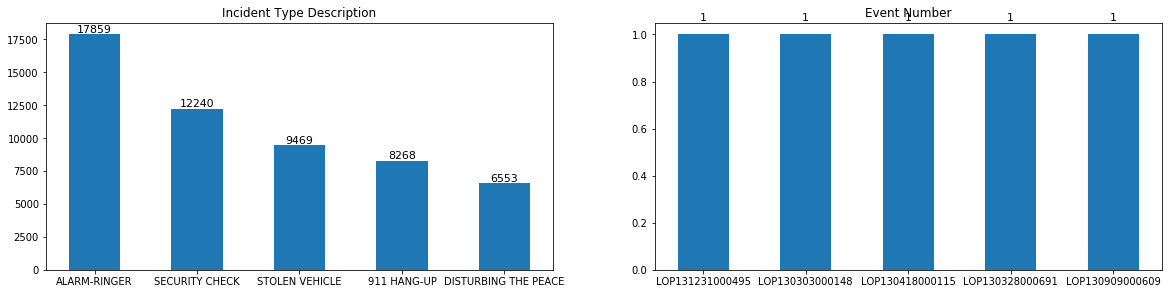

In [19]:
#2013年犯罪数据频数计算
year=2013
data1_number=data3
data1_number=data1_number.dropna(axis=0,how='all')

print("\nrecords-for-" + str(year)+".csv的频数聚合分析:")
data1_location_g=[]

data1_location=data1_number["Location "].value_counts(sort=True)
data1_location=data1_location.head(5)
data1_location_name=data1_location.index.tolist()
data1_location_num=data1_location.values
        
data1_area=data1_number["Area Id"].value_counts(sort=True)
data1_area=data1_area.head(2)
data1_area_name=data1_area.index.tolist()
data1_area_num=data1_area.values

data1_id=data1_number["Incident Type Id"].value_counts(sort=True)
data1_id=data1_id.head(5)
data1_id_name=data1_id.index.tolist()
data1_id_num=data1_id.values
    
data1_Description=data1_number["Incident Type Description"].value_counts(sort=True)
data1_Description=data1_Description.head(5)
data1_Description_name=data1_Description.index.tolist()
data1_Description_num=data1_Description.values

data1_Event=data1_number["Event Number"].value_counts(sort=True)
data1_Event=data1_Event.head(5)
data1_Event_name=data1_Event.index.tolist()
data1_Event_num=data1_Event.values
    
index=np.arange(5)
index_id=np.arange(2) 
plt.figure(figsize=(10, 5))
plt.bar(index,data1_location_num, 0.5, label="num")
plt.xticks(index,data1_location_name)
for a,b in zip(index,data1_location_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Location")

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)

plt.sca(ax1)
plt.bar(index_id,data1_area_num, 0.5, label="num")
plt.xticks(index_id,data1_area_name)
for a,b in zip(index_id,data1_area_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Area Id")

plt.sca(ax2)
plt.bar(index,data1_id_num, 0.5, label="num")
plt.xticks(index,data1_id_name)
for a,b in zip(index,data1_id_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Id")
    
plt.figure(figsize=(20,10))
ax3 = plt.subplot(2,2,1)
ax4 = plt.subplot(2,2,2)
plt.sca(ax3)
plt.bar(index,data1_Description_num, 0.5, label="num")
plt.xticks(index,data1_Description_name)
for a,b in zip(index,data1_Description_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Description")
    
plt.sca(ax4)
plt.bar(index,data1_Event_num, 0.5, label="num")
plt.xticks(index,data1_Event_name)
for a,b in zip(index,data1_Event_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Event Number")
    
plt.show()


records-for-2014.csv的频数聚合分析:


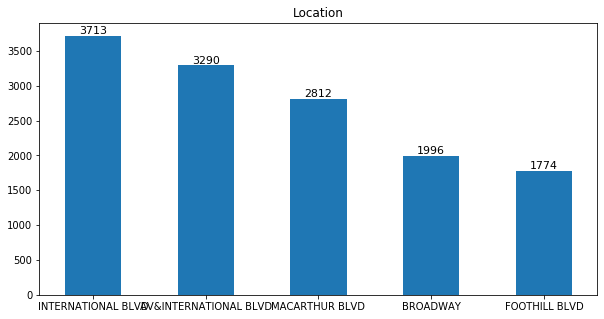

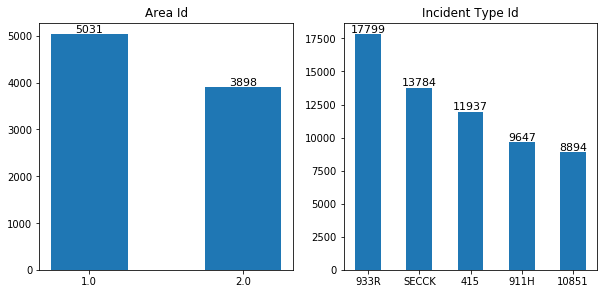

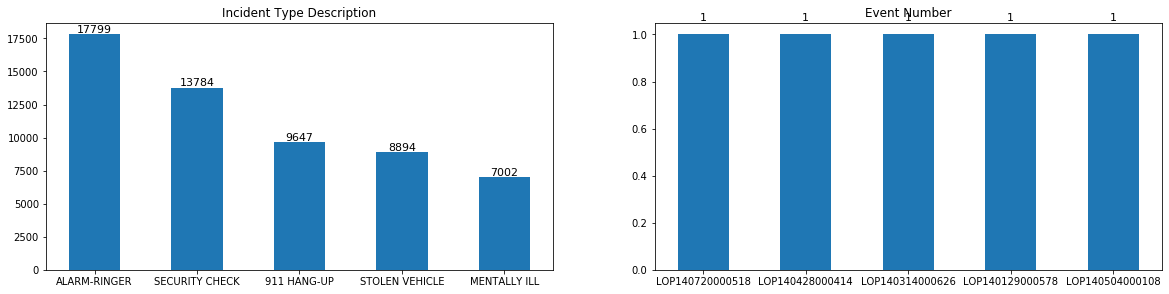

In [20]:
#2014年犯罪数据频数计算
year=2014
data1_number=data4
data1_number=data1_number.dropna(axis=0,how='all')

print("\nrecords-for-" + str(year)+".csv的频数聚合分析:")
data1_location_g=[]

data1_location=data1_number["Location 1"].value_counts(sort=True)
data1_location=data1_location.head(5)
data1_location_name=data1_location.index.tolist()
data1_location_num=data1_location.values
for data_g in data1_location_name:
    data1_location_g.append(data_g.split('"')[3])
data1_location_name=data1_location_g
        
data1_area=data1_number["Area Id"].value_counts(sort=True)
data1_area=data1_area.head(2)
data1_area_name=data1_area.index.tolist()
data1_area_num=data1_area.values

data1_id=data1_number["Incident Type Id"].value_counts(sort=True)
data1_id=data1_id.head(5)
data1_id_name=data1_id.index.tolist()
data1_id_num=data1_id.values
    
data1_Description=data1_number["Incident Type Description"].value_counts(sort=True)
data1_Description=data1_Description.head(5)
data1_Description_name=data1_Description.index.tolist()
data1_Description_num=data1_Description.values

data1_Event=data1_number["Event Number"].value_counts(sort=True)
data1_Event=data1_Event.head(5)
data1_Event_name=data1_Event.index.tolist()
data1_Event_num=data1_Event.values
    
index=np.arange(5)
index_id=np.arange(2) 
plt.figure(figsize=(10, 5))
plt.bar(index,data1_location_num, 0.5, label="num")
plt.xticks(index,data1_location_name)
for a,b in zip(index,data1_location_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Location")

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)

plt.sca(ax1)
plt.bar(index_id,data1_area_num, 0.5, label="num")
plt.xticks(index_id,data1_area_name)
for a,b in zip(index_id,data1_area_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Area Id")

plt.sca(ax2)
plt.bar(index,data1_id_num, 0.5, label="num")
plt.xticks(index,data1_id_name)
for a,b in zip(index,data1_id_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Id")
    
plt.figure(figsize=(20,10))
ax3 = plt.subplot(2,2,1)
ax4 = plt.subplot(2,2,2)
plt.sca(ax3)
plt.bar(index,data1_Description_num, 0.5, label="num")
plt.xticks(index,data1_Description_name)
for a,b in zip(index,data1_Description_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Description")
    
plt.sca(ax4)
plt.bar(index,data1_Event_num, 0.5, label="num")
plt.xticks(index,data1_Event_name)
for a,b in zip(index,data1_Event_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Event Number")
    
plt.show()


records-for-2015.csv的频数聚合分析:


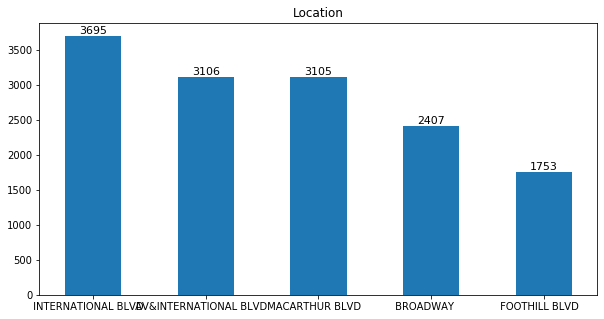

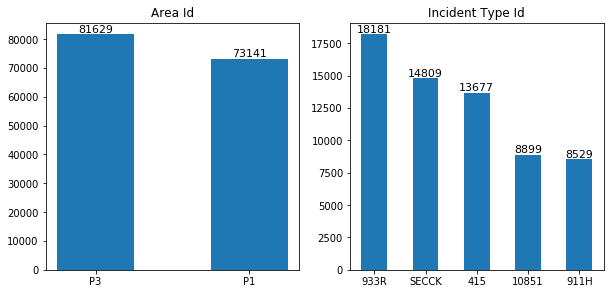

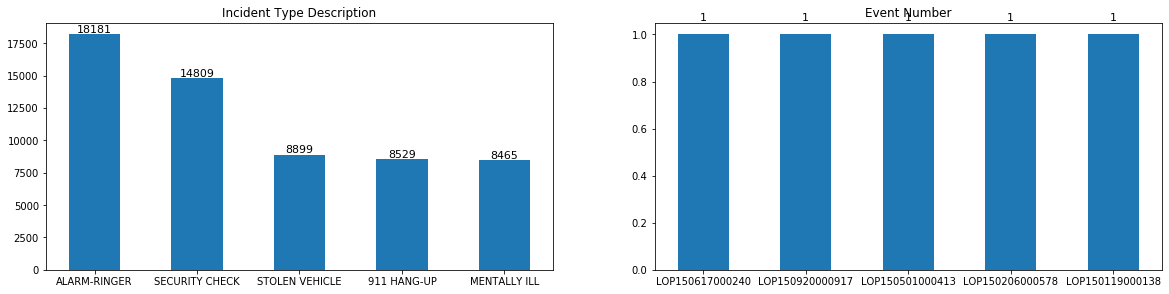

In [21]:
#2015年犯罪数据频数计算
year=2015
data1_number=data5
data1_number=data1_number.dropna(axis=0,how='all')

print("\nrecords-for-" + str(year)+".csv的频数聚合分析:")
data1_location_g=[]

data1_location=data1_number["Location"].value_counts(sort=True)
data1_location=data1_location.head(5)
data1_location_name=data1_location.index.tolist()
data1_location_num=data1_location.values
        
data1_area=data1_number["Area Id"].value_counts(sort=True)
data1_area=data1_area.head(2)
data1_area_name=data1_area.index.tolist()
data1_area_num=data1_area.values

data1_id=data1_number["Incident Type Id"].value_counts(sort=True)
data1_id=data1_id.head(5)
data1_id_name=data1_id.index.tolist()
data1_id_num=data1_id.values
    
data1_Description=data1_number["Incident Type Description"].value_counts(sort=True)
data1_Description=data1_Description.head(5)
data1_Description_name=data1_Description.index.tolist()
data1_Description_num=data1_Description.values

data1_Event=data1_number["Event Number"].value_counts(sort=True)
data1_Event=data1_Event.head(5)
data1_Event_name=data1_Event.index.tolist()
data1_Event_num=data1_Event.values
    
index=np.arange(5)
index_id=np.arange(2) 
plt.figure(figsize=(10, 5))
plt.bar(index,data1_location_num, 0.5, label="num")
plt.xticks(index,data1_location_name)
for a,b in zip(index,data1_location_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Location")

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)

plt.sca(ax1)
plt.bar(index_id,data1_area_num, 0.5, label="num")
plt.xticks(index_id,data1_area_name)
for a,b in zip(index_id,data1_area_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Area Id")

plt.sca(ax2)
plt.bar(index,data1_id_num, 0.5, label="num")
plt.xticks(index,data1_id_name)
for a,b in zip(index,data1_id_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Id")
    
plt.figure(figsize=(20,10))
ax3 = plt.subplot(2,2,1)
ax4 = plt.subplot(2,2,2)
plt.sca(ax3)
plt.bar(index,data1_Description_num, 0.5, label="num")
plt.xticks(index,data1_Description_name)
for a,b in zip(index,data1_Description_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Description")
    
plt.sca(ax4)
plt.bar(index,data1_Event_num, 0.5, label="num")
plt.xticks(index,data1_Event_name)
for a,b in zip(index,data1_Event_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Event Number")
    
plt.show()


records-for-2016.csv的频数聚合分析:


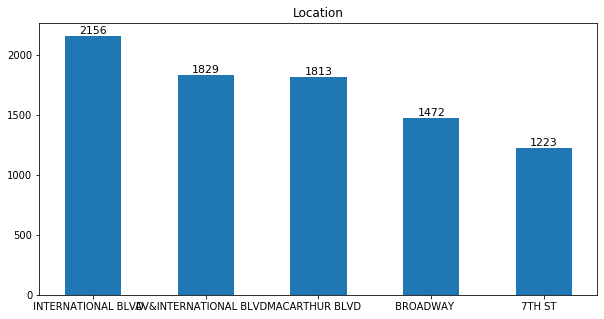

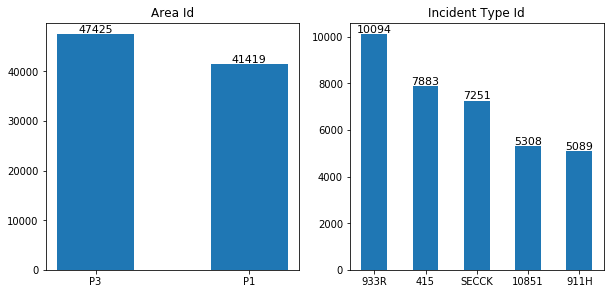

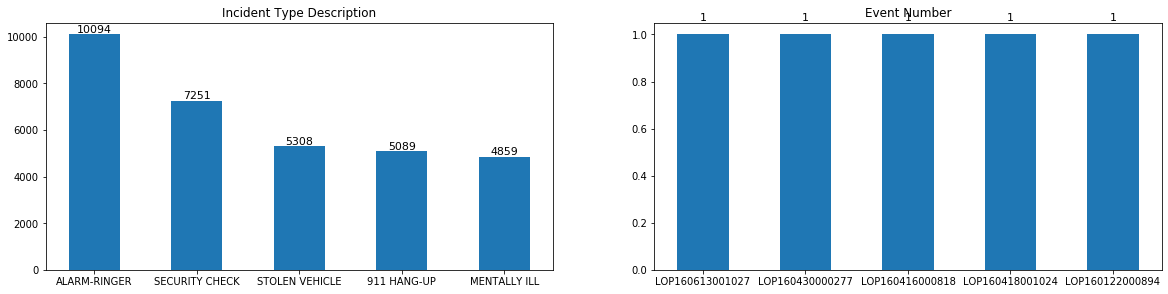

In [22]:
#2016年犯罪数据频数计算
year=2016
data1_number=data6
data1_number=data1_number.dropna(axis=0,how='all')

print("\nrecords-for-" + str(year)+".csv的频数聚合分析:")
data1_location_g=[]

data1_location=data1_number["Location"].value_counts(sort=True)
data1_location=data1_location.head(5)
data1_location_name=data1_location.index.tolist()
data1_location_num=data1_location.values
        
data1_area=data1_number["Area Id"].value_counts(sort=True)
data1_area=data1_area.head(2)
data1_area_name=data1_area.index.tolist()
data1_area_num=data1_area.values

data1_id=data1_number["Incident Type Id"].value_counts(sort=True)
data1_id=data1_id.head(5)
data1_id_name=data1_id.index.tolist()
data1_id_num=data1_id.values
    
data1_Description=data1_number["Incident Type Description"].value_counts(sort=True)
data1_Description=data1_Description.head(5)
data1_Description_name=data1_Description.index.tolist()
data1_Description_num=data1_Description.values

data1_Event=data1_number["Event Number"].value_counts(sort=True)
data1_Event=data1_Event.head(5)
data1_Event_name=data1_Event.index.tolist()
data1_Event_num=data1_Event.values
    
index=np.arange(5)
index_id=np.arange(2) 
plt.figure(figsize=(10, 5))
plt.bar(index,data1_location_num, 0.5, label="num")
plt.xticks(index,data1_location_name)
for a,b in zip(index,data1_location_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Location")

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)

plt.sca(ax1)
plt.bar(index_id,data1_area_num, 0.5, label="num")
plt.xticks(index_id,data1_area_name)
for a,b in zip(index_id,data1_area_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Area Id")

plt.sca(ax2)
plt.bar(index,data1_id_num, 0.5, label="num")
plt.xticks(index,data1_id_name)
for a,b in zip(index,data1_id_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Id")
    
plt.figure(figsize=(20,10))
ax3 = plt.subplot(2,2,1)
ax4 = plt.subplot(2,2,2)
plt.sca(ax3)
plt.bar(index,data1_Description_num, 0.5, label="num")
plt.xticks(index,data1_Description_name)
for a,b in zip(index,data1_Description_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Incident Type Description")
    
plt.sca(ax4)
plt.bar(index,data1_Event_num, 0.5, label="num")
plt.xticks(index,data1_Event_name)
for a,b in zip(index,data1_Event_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.title("Event Number")
    
plt.show()

### 数据缺失处理

In [23]:
#以2011年数据为例
# 判断各变量中是否存在缺失值
data1.isnull().any(axis = 0)
# 各变量中缺失值的数量
data1.isnull().sum(axis = 0)
# 各变量中缺失值的比例
data1.isnull().sum(axis = 0)/data1.shape[0]

Agency                       0.000006
Create Time                  0.000006
Location                     0.000000
Area Id                      0.005022
Beat                         0.002889
Priority                     0.000006
Incident Type Id             0.000006
Incident Type Description    0.000006
Event Number                 0.000006
Closed Time                  0.000039
dtype: float64

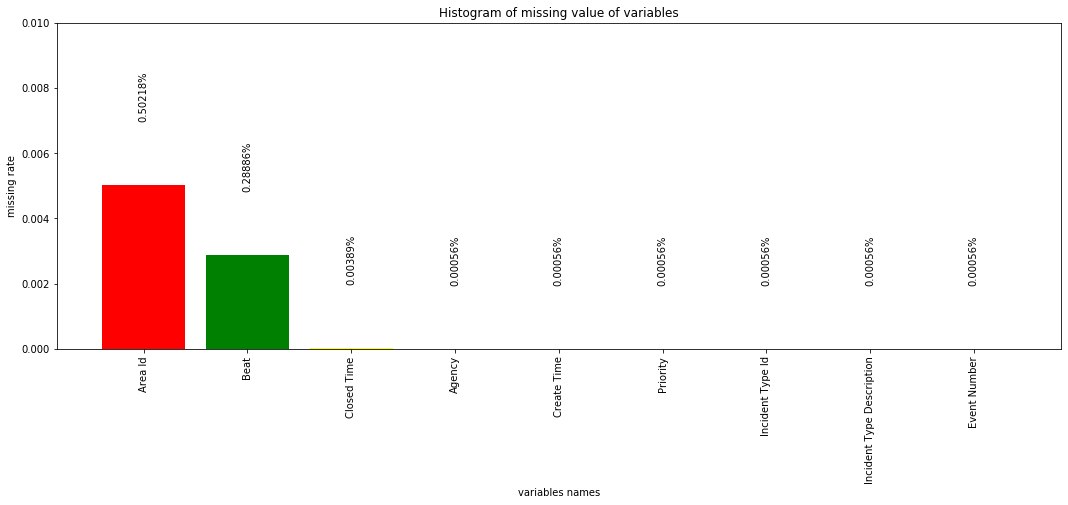

In [31]:
# 统计缺失值数量
missing=data1.isnull().sum().reset_index().rename(columns={0:'missNum'})
# 计算缺失比例
missing['missRate']=missing['missNum']/data1.shape[0]
# 按照缺失率排序显示
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
# miss_analy 存储的是每个变量缺失情况的数据框

import matplotlib.pyplot as plt
import pylab as pl

fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center'
    ,color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
# 添加x轴标签，并旋转90度
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)
# 添加数值显示
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.002,'{:.05%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,0.01])
    
plt.show()


剔除空属性值：
2011:的犯罪记录情况如下


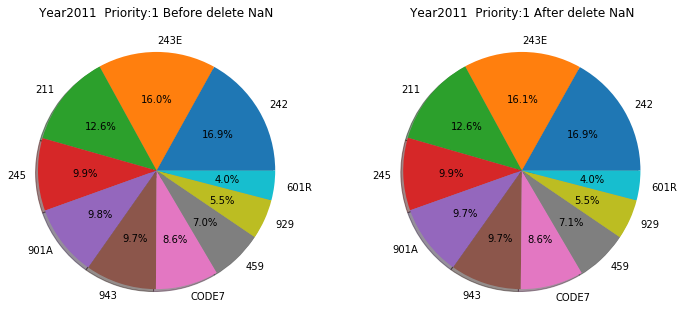

2012:的犯罪记录情况如下


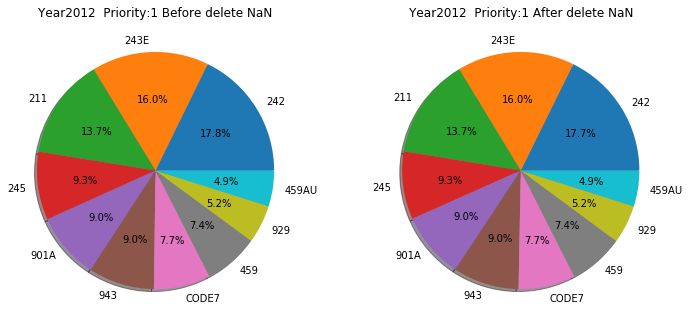

2013:的犯罪记录情况如下


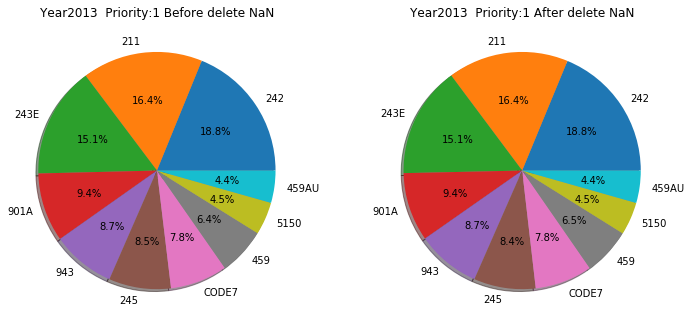

2014:的犯罪记录情况如下


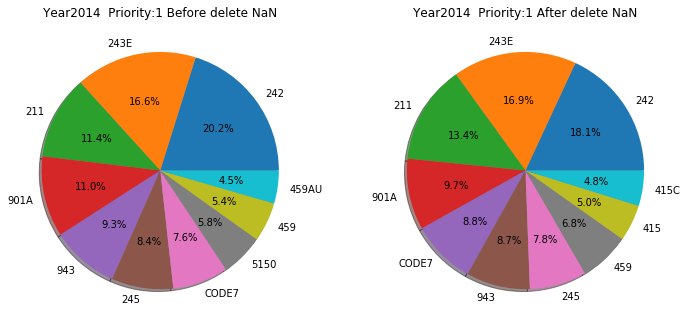

2015:的犯罪记录情况如下


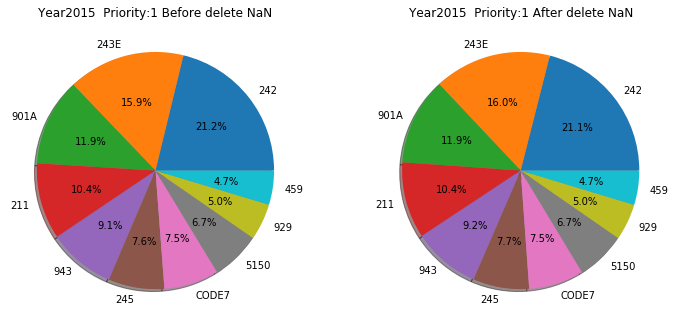

2016:的犯罪记录情况如下


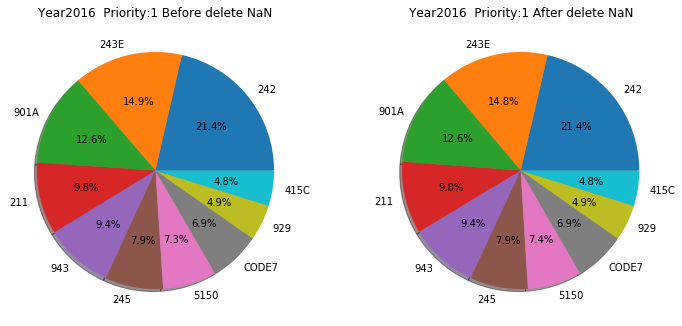

In [32]:
#剔除空属性值
print("\n剔除空属性值：")
year=2011
for data in data_all_crime:
    print(str(year)+":的犯罪记录情况如下")
    data_id=data[["Incident Type Id","Priority","Area Id","Beat","Incident Type Description","Closed Time"]]
    data_id=data_id.dropna(axis=0,how='any')   #剔除空属性值  
    data_id=data_id[["Incident Type Id","Priority"]]
    data_p1=data_id[data_id["Priority"].isin([1])]
    data_p1=data_p1["Incident Type Id"].value_counts(sort=True)
    
    data_id2=data[["Incident Type Id","Priority","Area Id","Beat","Incident Type Description","Closed Time"]]
    data_id2=data_id2.dropna(axis=0,how='all')   #剔除全空
    data_id2=data_id2[["Incident Type Id","Priority"]]
    data_p2=data_id2[data_id2["Priority"].isin([1])] 
    data_p2=data_p2["Incident Type Id"].value_counts(sort=True)

    data_p1=data_p1.head(10)
    crime_type1=data_p1.index.tolist()
    crime_num1=data_p1.values

    data_p2=data_p2.head(10)
    crime_type2=data_p2.index.tolist()
    crime_num2=data_p2.values


    plt.figure(figsize=(12,12))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    plt.sca(ax1)
    plt.pie(crime_num2,labels=crime_type2,autopct='%1.1f%%',shadow="true")#绘制饼图
    plt.title("Year"+str(year)+"  Priority:1 Before delete NaN")

    plt.sca(ax2)
    plt.pie(crime_num1,labels=crime_type1,autopct='%1.1f%%',shadow="true")#绘制饼图
    plt.title("Year"+str(year)+"  Priority:1 After delete NaN")
    
    plt.show()
    year+=1


用最高频率值填补缺失值：
2011:的犯罪片区情况如下
2012:的犯罪片区情况如下
2013:的犯罪片区情况如下
2014:的犯罪片区情况如下
2015:的犯罪片区情况如下
2016:的犯罪片区情况如下


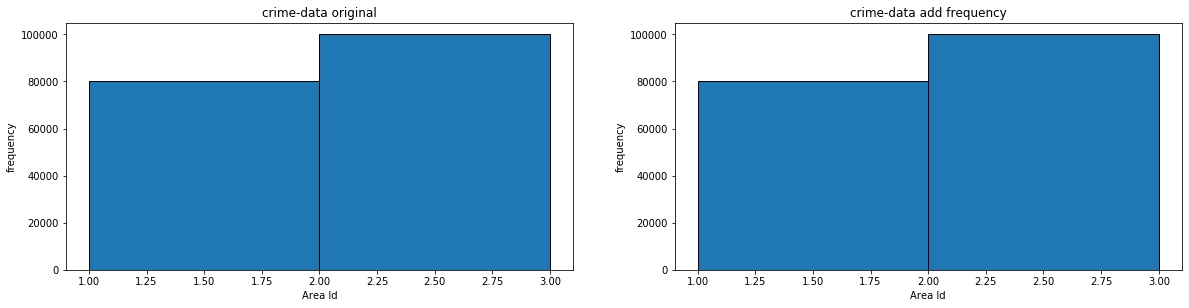

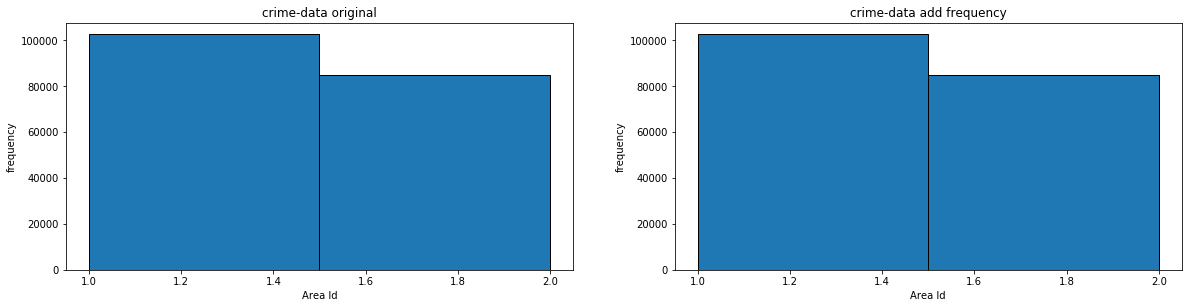

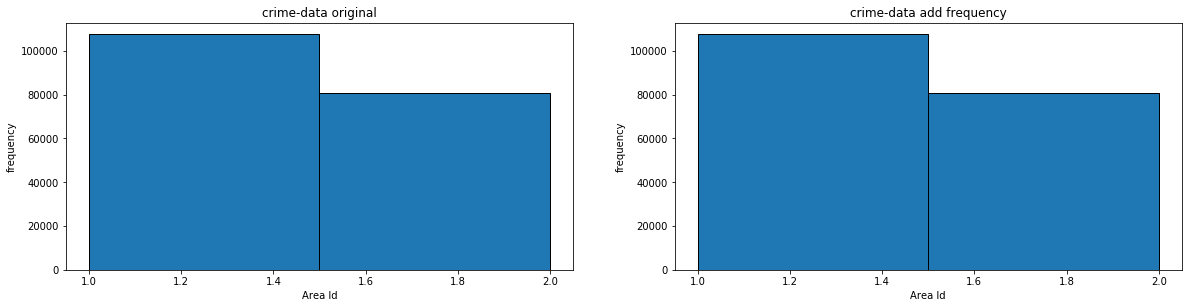

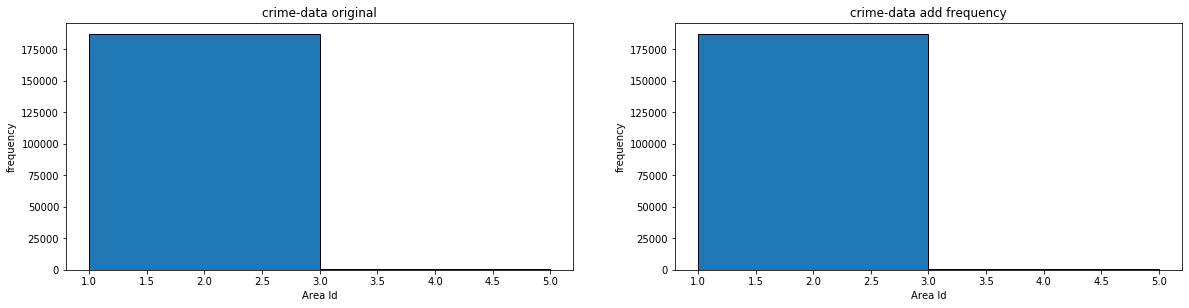

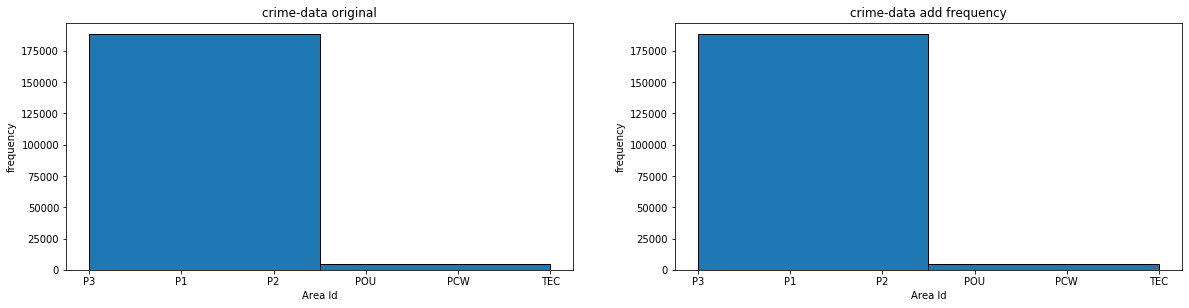

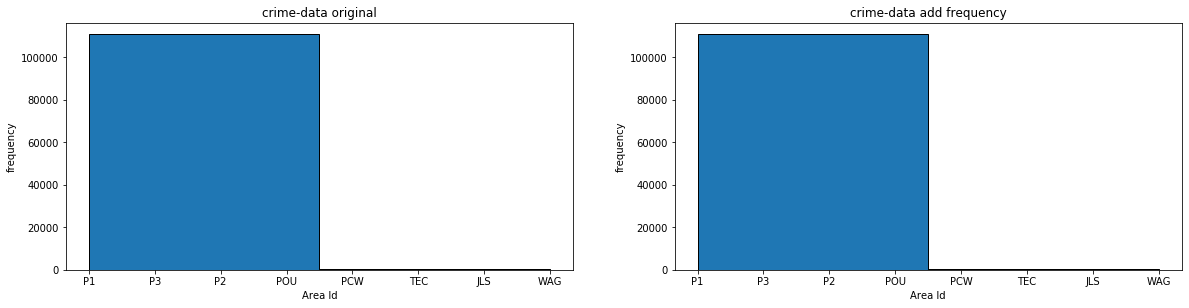

In [36]:
#用最高频率值填补缺失值
print("\n用最高频率值填补缺失值：")
year=2011
for data in data_all_crime:
    print(str(year)+":的犯罪片区情况如下")
    #用最高频率值来填补缺失值
    df=data
    area1=df['Area Id'].dropna()
    df.fillna(value = {'Area Id': df['Area Id'].mode()[0], # 使用区域的众数替换缺失区域                               
    }, inplace = True )
    area2=df['Area Id']
    plt.figure(figsize=(20,10))
    ax1=plt.subplot(2,2,1)
    ax2=plt.subplot(2,2,2)

    plt.sca(ax1)
    plt.hist(area1, bins=2,  edgecolor = 'black', histtype='bar', align='mid', orientation='vertical')
    plt.xlabel("Area Id")
    plt.ylabel("frequency")
    plt.title("crime-data original")

    plt.sca(ax2)
    plt.hist(area2, bins=2,  edgecolor = 'black', histtype='bar', align='mid', orientation='vertical')
    plt.xlabel("Area Id")
    plt.ylabel("frequency")
    plt.title("crime-data add frequency")
    year+=1

### **由于无其他标准意义上的数值属性，因此不讨论属性相关性以及对象相似性填充填充**